In [92]:
import pandas as pd
raw_df=pd.read_excel('DemoRepublic.xlsx')

In [93]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Undecided      10000 non-null  int64  
 1   Age            10000 non-null  int64  
 2   HomeOwner      10000 non-null  int64  
 3   Female         10000 non-null  int64  
 4   Married        10000 non-null  int64  
 5   HouseholdSize  10000 non-null  int64  
 6   Income         10000 non-null  float64
 7   Education      10000 non-null  int64  
 8   Church         10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


In [94]:
raw_df.head()

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,37,1,1,1,3,96.0,18,0
1,1,53,1,1,1,6,86.0,20,0
2,0,33,1,1,1,2,176.0,18,1
3,0,46,1,1,1,6,420.0,15,1
4,1,34,1,1,1,6,109.0,15,0


In [95]:
raw_df

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,37,1,1,1,3,96.0,18,0
1,1,53,1,1,1,6,86.0,20,0
2,0,33,1,1,1,2,176.0,18,1
3,0,46,1,1,1,6,420.0,15,1
4,1,34,1,1,1,6,109.0,15,0
...,...,...,...,...,...,...,...,...,...
9995,0,34,0,1,0,6,90.0,8,1
9996,0,52,0,0,0,1,39.0,8,0
9997,0,36,1,1,1,5,77.0,12,0
9998,0,27,1,1,0,1,140.5,12,0


In [96]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a dataframe called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'Undecided' )


In [97]:
print(X_features)

['Age', 'HomeOwner', 'Female', 'Married', 'HouseholdSize', 'Income', 'Education', 'Church']


In [98]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]


In [99]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.Undecided.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Undecided
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB
None


In [100]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 7000 entries, 7277 to 951
Series name: Undecided
Non-Null Count  Dtype   
--------------  -----   
7000 non-null   category
dtypes: category(1)
memory usage: 61.6 KB
None


In [101]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['HomeOwner','Female','Married','Church']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)



In [102]:
##-----------------------------------------------------------------------
##  2. Normalise the cont. columns
##-----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
continuous_columns= ['Age','Income','Education','HouseholdSize']
scaler_min_max = MinMaxScaler()
X_train_encoded[continuous_columns] = scaler_min_max.fit_transform(X_train_encoded[continuous_columns])
X_test_encoded[continuous_columns] = scaler_min_max.fit_transform(X_test_encoded[continuous_columns])

In [103]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 7277 to 951
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7000 non-null   float64
 1   HouseholdSize  7000 non-null   float64
 2   Income         7000 non-null   float64
 3   Education      7000 non-null   float64
 4   HomeOwner_1    7000 non-null   int64  
 5   Female_1       7000 non-null   int64  
 6   Married_1      7000 non-null   int64  
 7   Church_1       7000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 492.2 KB


In [104]:
X_train_encoded.head()

,Age,HouseholdSize,Income,Education,HomeOwner_1,Female_1,Married_1,Church_1
7277,0.241935,0.666667,0.174312,0.000000,1,1,1,0
9494,0.725806,0.333333,0.174312,0.416667,1,1,1,0
7504,0.403226,0.166667,0.201835,0.833333,1,1,1,0
94,0.370968,0.333333,0.245872,0.583333,1,1,1,1
9379,0.387097,0.333333,0.111927,0.833333,1,1,1,1


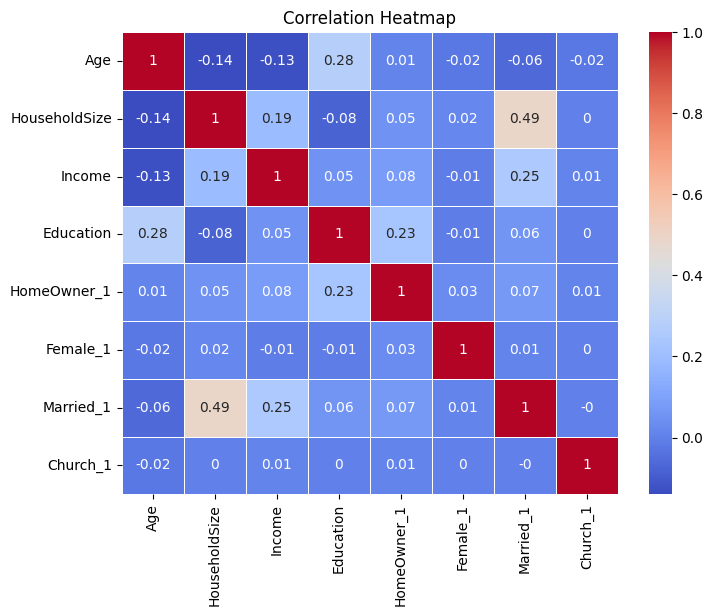

In [105]:
##-----------------------------------------------------------------------
##  3. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [106]:
corr_matrix

,Age,HouseholdSize,Income,Education,HomeOwner_1,Female_1,Married_1,Church_1
Age,1.000000,-0.136664,-0.125176,0.281161,0.014458,-0.022323,-0.064596,-0.023734
HouseholdSize,-0.136664,1.000000,0.193283,-0.079756,0.046933,0.016372,0.487442,0.004019
Income,-0.125176,0.193283,1.000000,0.048758,0.077881,-0.005521,0.248668,0.007248
Education,0.281161,-0.079756,0.048758,1.000000,0.227862,-0.010120,0.058805,0.002543
HomeOwner_1,0.014458,0.046933,0.077881,0.227862,1.000000,0.034114,0.074330,0.005584
Female_1,-0.022323,0.016372,-0.005521,-0.010120,0.034114,1.000000,0.005049,0.002141
Married_1,-0.064596,0.487442,0.248668,0.058805,0.074330,0.005049,1.000000,-0.003536
Church_1,-0.023734,0.004019,0.007248,0.002543,0.005584,0.002141,-0.003536,1.000000


In [107]:
from sklearn.neural_network import MLPClassifier
# no of nodes in hidden layer = 6
# no of iterations increased to 1500
# verbose  = True
# early stopping  = True
nn_model = MLPClassifier(random_state=42, verbose=True, max_iter=1500,hidden_layer_sizes=(6,), early_stopping = True )

In [108]:
print("Hyperparameters of the MLPClassifier:\n",nn_model.get_params() )

Hyperparameters of the MLPClassifier:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (6,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [109]:
##-------------------------------------------------------
##  Train NN model on training data
##-------------------------------------------------------
nn_model.fit(X_train_encoded, y_train)

Iteration 1, loss = 0.68714935
Validation score: 0.591429
Iteration 2, loss = 0.66111619
Validation score: 0.595714
Iteration 3, loss = 0.64906813
Validation score: 0.594286
Iteration 4, loss = 0.63528202
Validation score: 0.648571
Iteration 5, loss = 0.62038652
Validation score: 0.707143
Iteration 6, loss = 0.60838216
Validation score: 0.735714
Iteration 7, loss = 0.59819670
Validation score: 0.758571
Iteration 8, loss = 0.58889939
Validation score: 0.765714
Iteration 9, loss = 0.58068130
Validation score: 0.780000
Iteration 10, loss = 0.57313764
Validation score: 0.777143
Iteration 11, loss = 0.56615230
Validation score: 0.778571
Iteration 12, loss = 0.55986747
Validation score: 0.780000
Iteration 13, loss = 0.55439545
Validation score: 0.777143
Iteration 14, loss = 0.54938501
Validation score: 0.781429
Iteration 15, loss = 0.54460863
Validation score: 0.785714
Iteration 16, loss = 0.54009813
Validation score: 0.787143
Iteration 17, loss = 0.53557059
Validation score: 0.792857
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(6,), max_iter=1500,
              random_state=42, verbose=True)

In [110]:
##----------------------------
##  Apply model on test data
##----------------------------
y_prob=nn_model.predict_proba(X_test_encoded)[:,1] # probabilities
#y_prob holds the probability values for each record in the test data

In [111]:
y_prob

array([0.55914893, 0.96025853, 0.8234552 , ..., 0.83516193, 0.20962081,
       0.97218152])

In [112]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})
print(y_pred_df.head())

     actual_Y  predicted_prob
5503        1        0.559149
6376        1        0.960259
3861        1        0.823455
1308        0        0.222621
6380        1        0.885665


In [113]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
5503        1        0.559149            1
6376        1        0.960259            1
3861        1        0.823455            1
1308        0        0.222621            0
6380        1        0.885665            1


In [114]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1702   84]
 [  96 1118]]


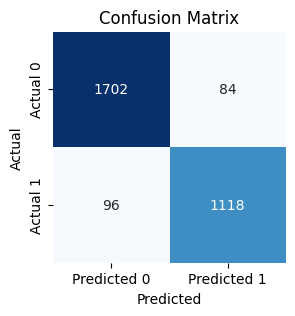

In [115]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [116]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
#print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.92
Accuracy: 0.94


In [117]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1786
           1       0.93      0.92      0.93      1214

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



acc = 94%
sens = 92%

- report->
- nn hyper params-
 max_iterations = 1500

 early_stopping = True

 hidden_layer_sizes = 6